In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error

In [26]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 60)
myData=pd.read_csv('imputedData.csv')
myData.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [27]:
#One hot encoding of categorical variables

#Create list with features to be dummified cols.
nonum_feats_names = ['Month','OperatingSystems','Browser','Region','VisitorType','Weekend']


dataModel = pd.concat([myData[['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                              'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
                               'TrafficType','SpecialDay']],
                       pd.get_dummies(myData[nonum_feats_names].astype('category')),myData['Revenue']],axis=1)
                      
dataModel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 57 columns):
Administrative                   12330 non-null int64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null int64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null int64
ProductRelated_Duration          12330 non-null float64
BounceRates                      12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
TrafficType                      12330 non-null int64
SpecialDay                       12330 non-null float64
Month_Aug                        12330 non-null uint8
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_June                       12330 non-null uint8
Month_Mar    

In [28]:
#Label Encoding of revenue

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
myData['Revenue'] = le.fit_transform(myData['Revenue'])
myData['Revenue'].value_counts()

myData['Revenue'].head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

In [29]:
# getting dependent and independent variables

x = dataModel
# removing the target column revenue from x
x = x.drop(['Revenue'], axis = 1)

y = myData['Revenue']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (12330, 56)
Shape of y: (12330,)


In [30]:
# splitting the data

from sklearn.model_selection import train_test_split

x_baseTrain, x_baseTest, y_baseTrain, y_baseTest = train_test_split(x, y, test_size = 0.3, random_state = 42)

# checking the shapes

print("Shape of x_train :", x_baseTrain.shape)
print("Shape of y_train :", y_baseTrain.shape)
print("Shape of x_test :", x_baseTest.shape)
print("Shape of y_test :", y_baseTest.shape)

Shape of x_train : (8631, 56)
Shape of y_train : (8631,)
Shape of x_test : (3699, 56)
Shape of y_test : (3699,)


In [31]:
#SCALING WITH STANDARD Z SCORE SCALER
#Scaling the data first fitting it and transforming the training set
#to later apply the fit to transform the test set.
from sklearn.preprocessing import StandardScaler

num_cols_names = ['Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 
                              'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues',
                               'TrafficType','SpecialDay']

#Instantiate Satandard Scaler
scaler = StandardScaler()
#Fit transform the numerical features in the training dataset to a new dataframe
scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(x_baseTrain[num_cols_names]), 
                                     columns=num_cols_names, index= x_baseTrain.index)
#Integrate scaled values to the training set
for col in num_cols_names:
    x_baseTrain[col] = scaled_numfeats_train[col]
    
    
#Transform the numerical features inthe training dataset to a new dataframe
scaled_numfeats_test = pd.DataFrame(scaler.transform(x_baseTest[num_cols_names]),
                                    columns=num_cols_names, index= x_baseTest.index)
#Integrate scaled values to the test set
for col in num_cols_names:
    x_baseTest[col] = scaled_numfeats_test[col]

C:\Users\neera\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\neera\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In all feature selection procedures, it is good practice to select the features by examining only the training set. And this is to avoid overfit.

In [32]:
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set

roc_values = []
for feature in x_baseTrain.columns:
    clf = DecisionTreeClassifier()
    clf.fit(x_baseTrain[feature].to_frame(), y_baseTrain)
    y_scored = clf.predict_proba(x_baseTest[feature].to_frame())
    roc_values.append(roc_auc_score(y_baseTest, y_scored[:, 1]))

In [33]:
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = x_baseTrain.columns
roc_values.sort_values(ascending=False)

TrafficType                      0.642461
Administrative                   0.630249
ProductRelated                   0.620175
Month_Nov                        0.592558
PageValues                       0.584450
ExitRates                        0.566526
Informational                    0.561337
VisitorType_Returning_Visitor    0.552021
BounceRates                      0.550649
Month_May                        0.550608
VisitorType_New_Visitor          0.549685
OperatingSystems_2               0.546457
SpecialDay                       0.532660
OperatingSystems_3               0.532516
Weekend_False                    0.524512
Weekend_True                     0.524512
Month_Mar                        0.520394
Month_Dec                        0.517950
Month_Feb                        0.508344
Month_Oct                        0.507958
Browser_1                        0.507698
Region_1                         0.507368
Browser_4                        0.507094
Browser_2                        0

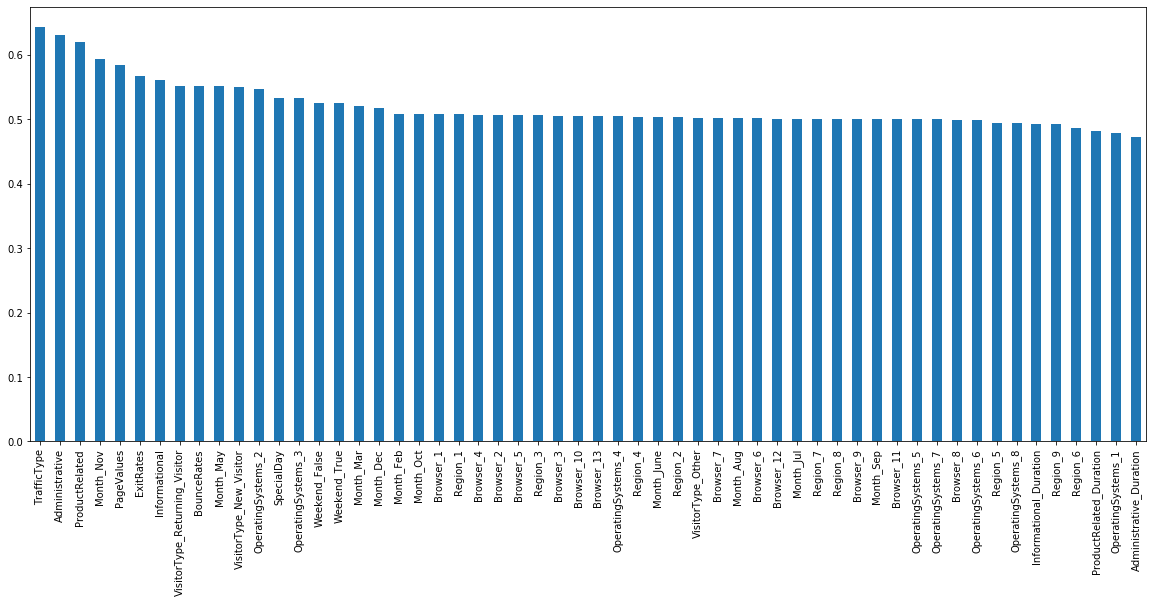

In [34]:
# and now let's plot
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [35]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

print(len(roc_values[roc_values > 0.5]))
print("features which should be retained\n\n",roc_values[roc_values > 0.5])

41
features which should be retained

 Administrative                   0.630249
Informational                    0.561337
ProductRelated                   0.620175
BounceRates                      0.550649
ExitRates                        0.566526
PageValues                       0.584450
TrafficType                      0.642461
SpecialDay                       0.532660
Month_Aug                        0.501455
Month_Dec                        0.517950
Month_Feb                        0.508344
Month_Jul                        0.500833
Month_June                       0.503698
Month_Mar                        0.520394
Month_May                        0.550608
Month_Nov                        0.592558
Month_Oct                        0.507958
OperatingSystems_2               0.546457
OperatingSystems_3               0.532516
OperatingSystems_4               0.504272
Browser_1                        0.507698
Browser_2                        0.507054
Browser_3                        0.50

41 of 56 features show a predictive performance higher than 0.5. This means that we could remove 15 features from this dataset using this method.

# Features which can be deleted

In [36]:
print("features which can be deleted\n\n",roc_values[roc_values <= 0.5])

features which can be deleted

 Administrative_Duration    0.472960
Informational_Duration     0.492929
ProductRelated_Duration    0.481084
Month_Sep                  0.499855
OperatingSystems_1         0.477892
OperatingSystems_5         0.499680
OperatingSystems_6         0.498239
OperatingSystems_7         0.499611
OperatingSystems_8         0.494415
Browser_8                  0.498815
Browser_9                  0.500000
Browser_11                 0.499680
Region_5                   0.494452
Region_6                   0.486827
Region_9                   0.492570
dtype: float64


Applying this feature selection on corr fixed data

In [37]:
x_baseTrain.drop(labels=['Browser_1','BounceRates','ProductRelated','VisitorType_Returning_Visitor'], 
                 axis=1, inplace=True)
x_baseTest.drop(labels=['Browser_1','BounceRates','ProductRelated','VisitorType_Returning_Visitor'], 
                axis=1, inplace=True)

x_baseTrain.shape, x_baseTest.shape

C:\Users\neera\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


((8631, 52), (3699, 52))

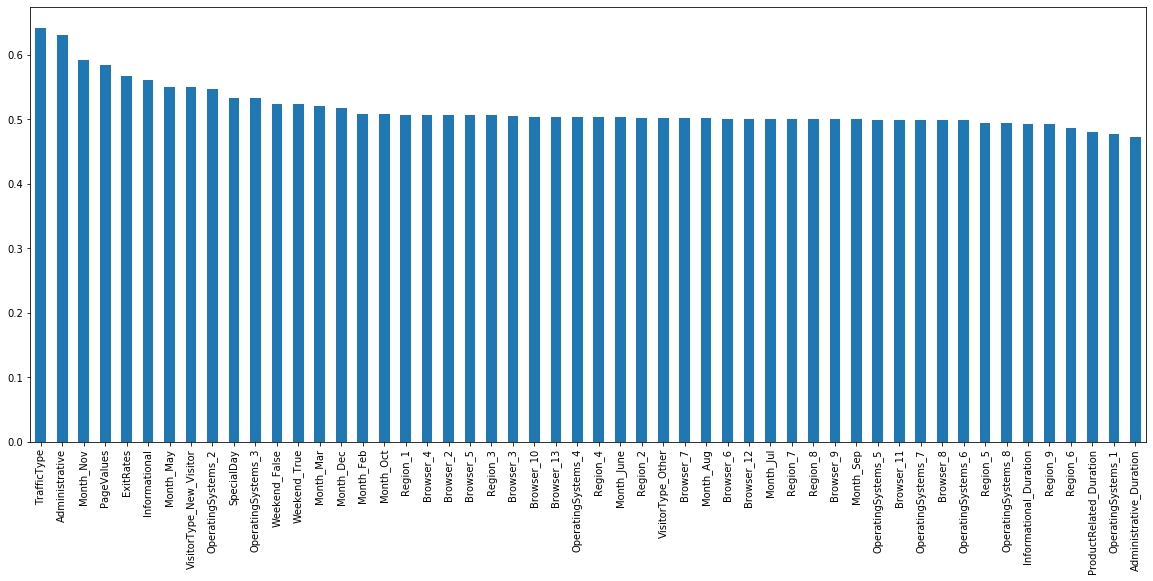

In [38]:
# loop to build a tree, make predictions and get the roc-auc
# for each feature of the train set

roc_values = []
for feature in x_baseTrain.columns:
    clf = DecisionTreeClassifier()
    clf.fit(x_baseTrain[feature].to_frame(), y_baseTrain)
    y_scored = clf.predict_proba(x_baseTest[feature].to_frame())
    roc_values.append(roc_auc_score(y_baseTest, y_scored[:, 1]))
    
# let's add the variable names and order it for clearer visualisation
roc_values = pd.Series(roc_values)
roc_values.index = x_baseTrain.columns
roc_values.sort_values(ascending=False)

# and now let's plot
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [39]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random

print(len(roc_values[roc_values > 0.5]))
print("features which should be retained\n\n",roc_values[roc_values > 0.5])

37
features which should be retained

 Administrative             0.630249
Informational              0.561337
ExitRates                  0.566526
PageValues                 0.584450
TrafficType                0.642461
SpecialDay                 0.532660
Month_Aug                  0.501455
Month_Dec                  0.517950
Month_Feb                  0.508344
Month_Jul                  0.500833
Month_June                 0.503698
Month_Mar                  0.520394
Month_May                  0.550608
Month_Nov                  0.592558
Month_Oct                  0.507958
OperatingSystems_2         0.546457
OperatingSystems_3         0.532516
OperatingSystems_4         0.504272
Browser_2                  0.507054
Browser_3                  0.504572
Browser_4                  0.507094
Browser_5                  0.506833
Browser_6                  0.501185
Browser_7                  0.501462
Browser_10                 0.504353
Browser_12                 0.500870
Browser_13               

37 of 52 features show a predictive performance higher than 0.5. This means that we could remove 15 features from this dataset using this method.

# Features which can be deleted in corr fixed data

In [40]:
print("features which can be deleted\n\n",roc_values[roc_values <= 0.5])

features which can be deleted

 Administrative_Duration    0.472960
Informational_Duration     0.492929
ProductRelated_Duration    0.481084
Month_Sep                  0.499855
OperatingSystems_1         0.477892
OperatingSystems_5         0.499680
OperatingSystems_6         0.498239
OperatingSystems_7         0.499611
OperatingSystems_8         0.494415
Browser_8                  0.498815
Browser_9                  0.500000
Browser_11                 0.499680
Region_5                   0.494452
Region_6                   0.486827
Region_9                   0.492570
dtype: float64
